In [1]:
import numpy as np
import pandas as pd

In [2]:
credit=pd.read_csv("C:\\Users\\HP\\Documents\\Data Science\\Data Set\\creditcard.csv")

In [3]:
credit.shape

(284807, 8)

In [4]:
credit.head()

,Time,V1,V2,V3,V4,V5,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,69.99,0


In [5]:
credit["Class"].value_counts()/len(credit)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [6]:
import seaborn as sns

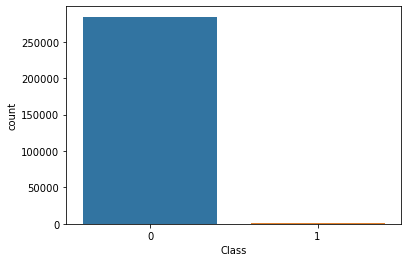

In [7]:
sns.countplot(credit["Class"])

In [10]:
credit["Class"].value_counts()/len(credit)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [8]:
x_train=credit.drop(["Class"],axis=1)
y_train=credit["Class"]

In [9]:
credit["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [28]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)

C:\Users\Koti\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9980478007914131

In [11]:
credit["pred"]=lg.predict(x_train)

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(credit["Class"],lg.predict(x_train))

0.6520626812497131

In [12]:
credit.head()

,Time,V1,V2,V3,V4,V5,Amount,Class,pred
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,69.99,0,0


In [13]:
pd.crosstab(credit["Class"],credit["pred"])

pred,0,1
Class,,
0,284101,214
1,342,150


In [14]:
from imblearn.under_sampling import RandomUnderSampler


C:\Users\Koti\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\Koti\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [15]:
ros=RandomUnderSampler(return_indices=True)
re_xtrain,re_ytrain,id_rus=ros.fit_sample(x_train,y_train)

C:\Users\Koti\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [16]:
re_ytrain.shape

(984,)

In [17]:
re_xtrain.shape

(984, 7)

In [18]:
re_ytrain

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
np.unique(re_ytrain)

array([0, 1], dtype=int64)

In [26]:
sum(re_ytrain==1)/len(re_ytrain)

0.5

In [47]:
from sklearn.linear_model import LogisticRegression
lg1=LogisticRegression()
lg1.fit(re_xtrain,re_ytrain)
print("accuracy",lg1.score(re_xtrain,re_ytrain))
print("roc score",roc_auc_score(re_ytrain,lg1.predict(re_xtrain)))

accuracy 0.9024390243902439
roc score 0.9024390243902439


In [31]:
credit.shape

(284807, 9)

In [33]:
credit.drop(["pred"],1,inplace=True)

In [34]:
fraud_records=credit[credit["Class"]==1]
non_fraud_records=credit[credit["Class"]==0]
print(fraud_records.shape,non_fraud_records.shape)

(492, 8) (284315, 8)


In [35]:
non_fraud_records.head()

,Time,V1,V2,V3,V4,V5,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,69.99,0


In [36]:
non_fraud_records["Amount"].mean()

88.29102242231328

In [40]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(non_fraud_records,test_size=0.0142,random_state=0)
print(train.shape,test.shape)

(280277, 8) (4038, 8)


In [41]:
test["Amount"].mean()

87.94405151064883

In [43]:
under_sample_data=fraud_records.append(test)

In [44]:
under_sample_data.shape

(4530, 8)

In [45]:
under_sample_data["Class"].value_counts()/len(under_sample_data)

0    0.891391
1    0.108609
Name: Class, dtype: float64

In [46]:
x_train=under_sample_data.drop(["Class"],axis=1)
y_train=under_sample_data["Class"]

In [49]:
from sklearn.linear_model import LogisticRegression
lg1=LogisticRegression()
lg1.fit(x_train,y_train)
print("accuracy",lg1.score(x_train,y_train))
print("roc score",roc_auc_score(y_train,lg1.predict(x_train)))

accuracy 0.9582781456953643
roc score 0.8659352009567645


In [39]:
from imblearn.over_sampling import RandomOverSampler
rs=RandomOverSampler()
re_x_train,re_y_train=rs.fit_sample(x_train,y_train)

C:\Users\Koti\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [22]:
np.unique(re_y_train)

array([0, 1], dtype=int64)

In [23]:
re_x_train.shape

(568630, 7)

In [31]:
credit.shape

(284807, 9)

In [24]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
re_x_train,re_y_train=sm.fit_sample(x_train,y_train)

In [25]:
#https://www.clips.uantwerpen.be/pages/mbsp-tags
re_x_train.shape

(568630, 7)